# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [23]:
# --------------------------------------
import pandas as pd
import numpy as np
import re
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [24]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [25]:
# word net import:

# unmark if you want to use:
#import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [26]:
# Hebrew tokenizer import:

# unmark if you want to use:
#import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [27]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [28]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [29]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

First we concatenate the test and train corpus to vectorize them using countvectorizer such that the dimantions of the vectorized tables would fit.

# Pre-Processing 

We define a function that preprocess out corpus to remove punction and normalize words. 

In [30]:
def preprocessing(df: pd.DataFrame):
    # Removing non-Hebrew characters
    df['story'] = df['story'].str.replace(r'[^\u0590-\u05fe\s]+', '', regex=True)

    # Fixing words - converting to final form
    word_mappings = {
        r'מ\b': 'ם',
        r'נ\b': 'ן',
        r'פ\b': 'ף',
        r'כ\b': 'ך',
        r'צ\b': 'ץ'
    }
    for pattern, replacement in word_mappings.items():
        df['story'] = df['story'].apply(lambda x: re.sub(pattern, replacement, x))

    # Stemming:
    prefix_patterns = r'\b(כ|ו|כש|וכש|וש|לכש|ב|ש|ה|ל)'
    df['story'] = df['story'].apply(lambda x: re.sub(prefix_patterns, '', x))

    suffix_patterns = r'(תי|ו|נו|ים)\b'
    df['story'] = df['story'].apply(lambda x: re.sub(suffix_patterns, '', x))
    df['story'] = df['story'].apply(lambda x: re.sub(r'ות\b', 'ה', x)) # Change from female plural form to singular form 

    # Removing words that have less than 3 letters - many of them are stop words
    df['story'] = df['story'].str.replace(r'\b\w{1,2}\b', '', regex=True)

    # Removing multiple spaces
    df['story'] = df['story'].apply(lambda x: re.sub(r'\s+', ' ', x))


In [31]:
# apply preprocessing on original datasets: 
preprocessing(df_train)
preprocessing(df_test)

# Vectorization 

In [32]:
vec = CountVectorizer(tokenizer=lambda x:x.split(' '), ngram_range=(1,3),min_df=5 ,max_df= 400, max_features=10000)
df_for_vec = pd.concat([df_train ,df_test] ,axis=0)
corpus_vectorized = vec.fit_transform(df_for_vec['story'].to_list())

tokenize the words using a CountVectorizer
we chose the parameterse :
* min_df = 5
* max_df = 400
* n_gram = (1,3)

In [33]:
df_vectorized =pd.DataFrame(corpus_vectorized.toarray(), columns=vec.get_feature_names_out())

In [34]:
df_vectorized.shape

(1076, 8859)

Than we split the train and test datasets after we tokenized them and concat the labels to the train set.

In [35]:
no_train = df_train.shape[0]
df_vectorized_train , df_vectorized_test = df_vectorized.iloc[:no_train, :] , df_vectorized.iloc[no_train::, :]

In [36]:
X ,y  = df_vectorized_train , df_train['gender'].replace({'m': 0, 'f': 1}) 

In [37]:
X.head()
X.shape
y
y.shape

אני   יום   קרה   תחיל  אבא  אבד  אבדה  אבה  אבוא  אבוד  אבטחה  אבטלה  \
0  0     0     0     0      0    0    0     0    0     0     0      0      0   
1  1     0     0     0      0    0    0     0    0     0     0      0      0   
2  0     0     0     0      0    0    0     0    0     0     0      0      0   
3  0     0     0     0      0    8    0     0    0     0     0      0      0   
4  2     0     0     0      0    0    0     0    0     0     0      0      0   

   אבי  אבי ראש  אביא  אביב  אבל אחד  אבל אחר  אבל אחרי  אבל אין  אבל אין עשה  \
0    0        0     0     0        0        1         0        0            0   
1    0        0     0     0        0        0         0        0            0   
2    0        0     0     0        0        0         2        0            0   
3    0        0     0     0        0        0         0        0            0   
4    0        0     0     0        0        0         0        0            0   

   אבל אמר  אבל אמר עצמי  אבל אמת  אבל אנח  אבל אני  אבל בסוף  אבל גלל  \
0        0             0        0        0        0         0        0   
1        0             0        0        0        1         0        0   
2        0             0        0        0        1         0        0   
3        0             0        0        0        0         0        0   
4        0             0        0        0        0         0        0   

   אבל דבר  אבל דרך  אבל החלט  אבל ווה  אבל זאת  אבל זמן  אבל חבר  אבל חייב  \
0        0        0         0        0        0        1        0         0   
1        0        0         0        0        0        0        0         0   
2        0        0         0        0        0        0        0         0   
3        0        0         0        0        0        0        0         0   
4        0        0         1        0        0        0        0         0   

   אבל חלט  אבל חשב  אבל חשוב  אבל ידע  אבל יום  אבל יותר  אבל ייתה  אבל יכול  \
0        0        0         0        0        0         0         0         0   
1        0        0         0        0        0         0         0         0   
2        0        0         0        0        0         0         0         0   
3        0        0         0        0        0         0         0         0   
4        0        1         0        0        0         0         0         0   

   אבל מאוד  אבל מהר  אבל מהר מאוד  אבל מובן  אבל מזל  אבל מכיוון  אבל ממש  \
0         0        0             0         0        0           0        0   
1         0        0             0         0        0           0        0   
2         0        0             0         0        0           0        0   
3         0        0             0         0        0           0        0   
4         0        0             0         0        0           0        0   

   אבל מצא  אבל מצד  אבל מקום  אבל מרה  אבל משה  אבל נראה  אבל סוף  אבל סופ  \
0        0        0         0        0        0         0        0        0   
1        0        0         0        0        0         0        0        0   
2        0        0         0        0        0         0        0        0   
3        0        0         0        0        0         0        0        0   
4        0        0         0        0        0         0        0        0   

   אבל סופ דבר  אבל סיפור  אבל עבר  אבל עדיין  אבל עוד  אבל עכשי  אבל פחה  \
0            0          0        0          1        0         0        0   
1            0          0        0          0        0         0        0   
2            0          0        0          0        0         0        1   
3            0          0        0          0        0         0        0   
4            0          0        0          0        0         0        0   

   אבל פעם  אבל פשוט  אבל צלח  אבל צלחה  אבל צערי  אבל צריך  אבל קרה  אבל ראי  \
0        0         0        0         0         0         0        0        0   
1        0         0        0         0         0         0    

(753, 8859)

0      0
1      0
2      1
3      0
4      1
      ..
748    0
749    0
750    0
751    1
752    0
Name: gender, Length: 753, dtype: int64

(753,)

## Preparing for machine learning 

To evaluate the machine learning model we first divide the labeled dataset into train and validation set

Definition of the scorer for the machine learning models as described in the assignment's instructions
the scorer uses macro average, meaning the f1 score is evaluated for each label (Male and Female) and averages the two f1 scores

In [38]:
from sklearn.metrics import make_scorer
scorer_macro = make_scorer(f1_score , average="macro")

# Training

Let's evaluate different machine learning algorithms and hyper-parameters. 


First we picked a random machine learning model to see that we can establish the machine learning flow

In [39]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)

In [40]:
cross_val_score(clf, X , y, scoring=scorer_macro , cv=10 , n_jobs=-1)

array([0.73732719, 0.5431694 , 0.6888189 , 0.67939584, 0.6662102 ,
       0.736     , 0.8076375 , 0.66666667, 0.76489028, 0.65277778])

Now, using grid search we will find a better fitting model
1. `svm.SVC` (Support Vector Classifier):
   - `C`: The regularization parameter. We can test different values, such as [0.1, 1, 10].
   - `kernel`: The kernel function. We can try ['linear', 'rbf', 'poly'].

2. `LinearSVC` (Linear Support Vector Classifier):
   - `C`: The regularization parameter. We can test different values, such as [0.1, 1, 10].

3. `MLPClassifier` (Multi-layer Perceptron Classifier):
   - `hidden_layer_sizes`: The number of units in the hidden layers. We can try [(50,), (100,), (50, 50)].
   - `activation`: The activation function. We can test ['logistic', 'relu'].
   - `learning_rate_init`: The initial learning rate. We can try different values, such as [0.001, 0.01, 0.1].

4. `Perceptron`:
   - `alpha`: The constant multiplier of the regularization term. We can try different values, such as [0.0001, 0.001, 0.01].

5. `SGDClassifier` (Stochastic Gradient Descent Classifier):
   - `alpha`: The constant multiplier of the regularization term. We can try different values, such as [0.0001, 0.001, 0.01].
   - `loss`: The loss function. We can test ['hinge', 'log', 'modified_huber'].

6. `KNeighborsClassifier`:
   - `n_neighbors`: The number of neighbors. We can try different values, such as [3, 5, 7].
   - `weights`: The weight function used in prediction. We can test ['uniform', 'distance'].

7. `DecisionTreeClassifier`:
   - `max_depth`: The maximum depth of the tree. We can try [None, 5, 10].
   - `criterion`: The function to measure the quality of a split. We can test ['gini', 'entropy'].

8. `MultinomialNB`:
   - No specific parameters to tune.

9. `GaussianNB`:
   - No specific parameters to tune.

In [46]:
classifiers = [
    svm.SVC(kernel='linear', random_state=42),
    LinearSVC(random_state=42),
    MLPClassifier(random_state=42),
    Perceptron(random_state=42),
    SGDClassifier(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    MultinomialNB(),
    GaussianNB()
]

params = [
    # svm.SVC
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    # LinearSVC
    {
        'C': [0.1, 1, 10]
    },
    # MLPClassifier
    {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['logistic', 'relu'],
        'learning_rate_init': [0.001, 0.01, 0.1]
    },
    # Perceptron
    {
        'alpha': [0.0001, 0.001, 0.01]
    },
    # SGDClassifier
    {
        'alpha': [0.0001, 0.001, 0.01],
        'loss': ['hinge', 'log', 'modified_huber']
    },
    # KNeighborsClassifier
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    # DecisionTreeClassifier
    {
        'max_depth': [None, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    # MultinomialNB
    {},
    # GaussianNB
    {}
]

In [49]:
best_classifier = None
best_params = None
best_score = 0.0

for classifier, param in zip(classifiers, params):
    grid_search = GridSearchCV(classifier, param_grid=param ,n_jobs=-1 , scoring=scorer_macro)
    grid_search.fit(X,y)
    print("Best parameters for", classifier.__class__.__name__)
    print(grid_search.best_params_)
    print()
    if grid_search.best_score_ > best_score:
        best_classifier = classifier
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

best_classifier_tuple = (best_classifier, best_params)
print("---------------------------------")
print("Best scoring classifier:", best_classifier_tuple)

GridSearchCV(estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for SVC
{'C': 1, 'kernel': 'linear'}



/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of

GridSearchCV(estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for LinearSVC
{'C': 10}



/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for MLPClassifier
{'activation': 'logistic', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1}



GridSearchCV(estimator=Perceptron(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for Perceptron
{'alpha': 0.0001}



/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/archie/miniconda3/envs/data_science_class/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated 

GridSearchCV(estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'log', 'modified_huber']},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for SGDClassifier
{'alpha': 0.0001, 'loss': 'log'}



GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for KNeighborsClassifier
{'n_neighbors': 3, 'weights': 'distance'}



GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10]},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for DecisionTreeClassifier
{'criterion': 'gini', 'max_depth': 10}



GridSearchCV(estimator=MultinomialNB(), n_jobs=-1, param_grid={},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for MultinomialNB
{}



GridSearchCV(estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring=make_scorer(f1_score, average=macro))

Best parameters for GaussianNB
{}

---------------------------------
Best scoring classifier: (MultinomialNB(), {})


In [52]:
print(f"f1 score of the best fitting model is {best_score}")

f1 score of the best fitting model is 0.709123855788296


MultinomialNB() gives the best fitting of ~71% when cross-folded with the dataset 5 times. We shall retrain this classifier on our dataset and predict the test set. 

In [56]:
clf = MultinomialNB()
clf.fit(X,y)
df_predicted = pd.Series(clf.predict(df_vectorized_test))

MultinomialNB()

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [57]:
df_predicted.to_csv('classification_results.csv',index=False)

([<matplotlib.patches.Wedge at 0x7f40689b6920>,
 [Text(-0.9120077486266528, 0.6150137124039954, 'Male'),
  Text(0.9120076910449092, -0.6150137977923207, 'Female')],
 [Text(-0.4974587719781742, 0.3354620249476338, '81.1%'),
  Text(0.49745874056995043, -0.33546207152308394, '18.9%')])

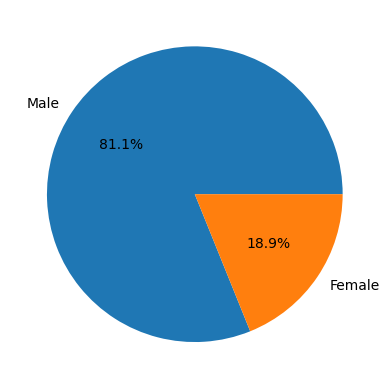

In [74]:
fig, ax = plt.subplots()
ax.pie(df_predicted.value_counts(), autopct='%1.1f%%', labels=["Male","Female"])